# Plotting NonMeshAligned tpv3 and Kostrov

by JN Hayek (Created on 06.08.2020)

In [3]:
import sys
sys.path.insert(0,"/home/nico/Tools/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [4]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax
# Save into a class the 


class TPV3reference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and 
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax
    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig,inverted=False):
    """
    Format a figure and 4 equidistant reveivers' lines from a single file. Receiver distance defines the color.
    """
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    ReceiversLabelList = ['2km','4km', '6km', '8km']
    if (inverted):
        ReceiversLabelList.reverse()
        
    legend2 = fig.axes[-1].legend(Lines, ReceiversLabelList , loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

def Multi_format_axes(fig,cmap, LabelsPerColor):
    """
    Format a figure that contains different files with 
    information from several receivers for simulations under sets of blending parameters.
    """
    ColorDict = dict(enumerate(LabelsPerColor)) 
    
    
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth = 3, label = ColorDict.get(-idx)))
    
    legend2 = fig.axes[-1].legend(Lines, LabelsPerColor, loc = 2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    

In [5]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [6]:
pathTPV = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/[TPV3]Results/"

# Reference saved into a list of objects

RefListTPV =  [TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-2.0e+03.txt", "2km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-4.0e+03.txt", "4km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-6.0e+03.txt", "6km"),
               TPV3reference(pathTPV + "Reference/sem2dpack/[TPV3]sem2dpack-{}-receiver-8.0e+03.txt", "8km"),
              ]


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.scientific.sequential import Oslo_5

cmap = ListedColormap(Oslo_5.mpl_colors[:])

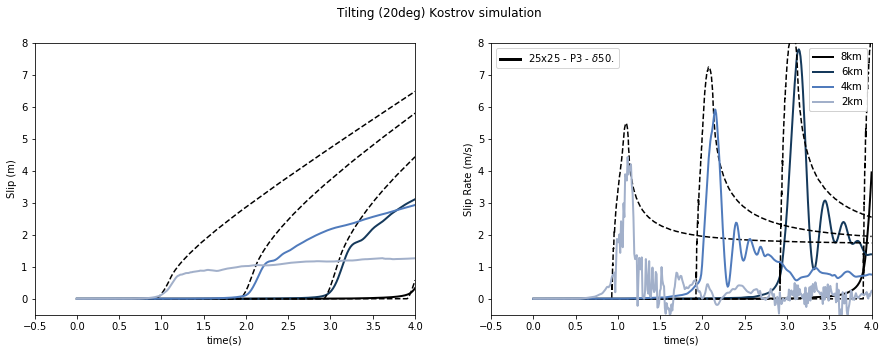

In [8]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210913/"
TiltedFile = LoadPickleFile(Filename = "P4_P3_025x025_SteepBlend_delta50-Tilt20.0-P3-TPList_t8180_d50.0.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["25x25 - P3 - $\delta$50."]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) Kostrov simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]
format_axes(fig,True)

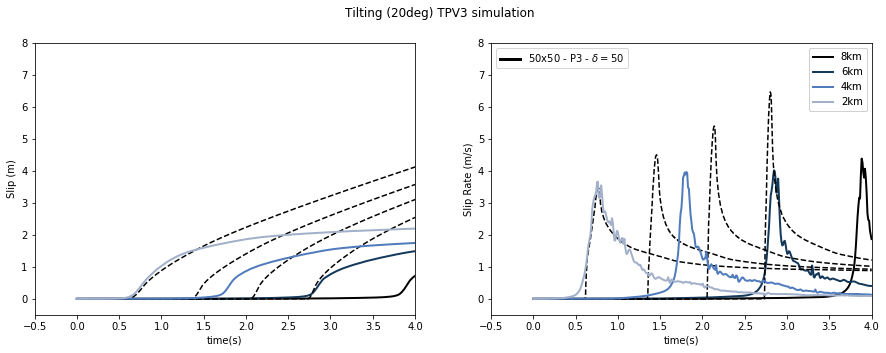

In [9]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210913/"
TiltedFile = LoadPickleFile(Filename = "P5_P3_050x050_tpv3_delta1dy_phio0.75_A5_TiltedExtended-Tilt20.0-P1-TPList_t4090_d50.0.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) TPV3 simulation")



[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)

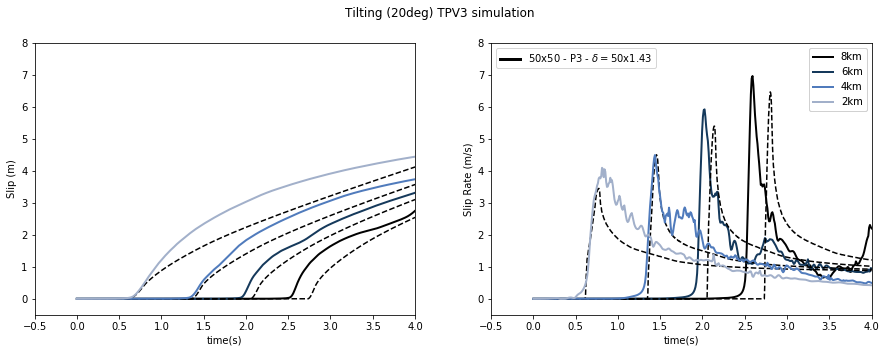

In [10]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210913/"
TiltedFile = LoadPickleFile(Filename = "P5_P3_050x050_tpv3_delta1.43dy_phio0.75_A5-Tilt20.0-P1-TPList_t4090_d71.5.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

Multi_format_axes(fig, cmap, LabelsPerColor)
fig.suptitle("Tilting (20deg) TPV3 simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)

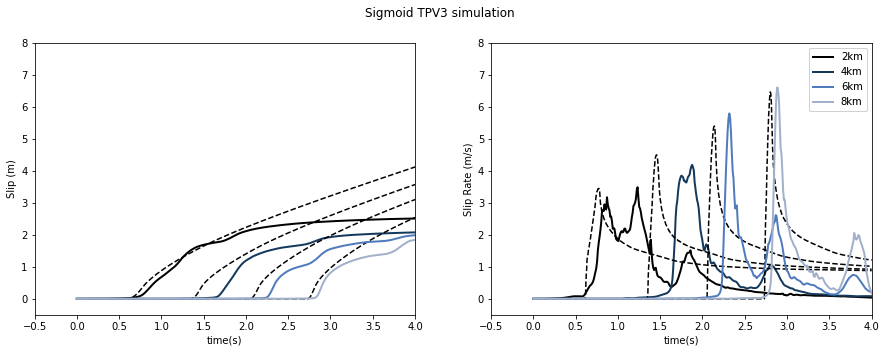

In [11]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210913/"
FolderSigmoidPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/"


SigmoidFile = LoadPickleFile(FolderSigmoidPath, "20210914-P5_P3_050x050_tpv3_delta1dy_phio0.75_A5_SigmoidExtended_Tweak-50")

fig, axis = GenericFigAxis()

# Sigmoid case plotting
iidx = 0
for iidx,Test1 in enumerate(SigmoidFile):
    axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$"]

fig.suptitle("Sigmoid TPV3 simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,False)

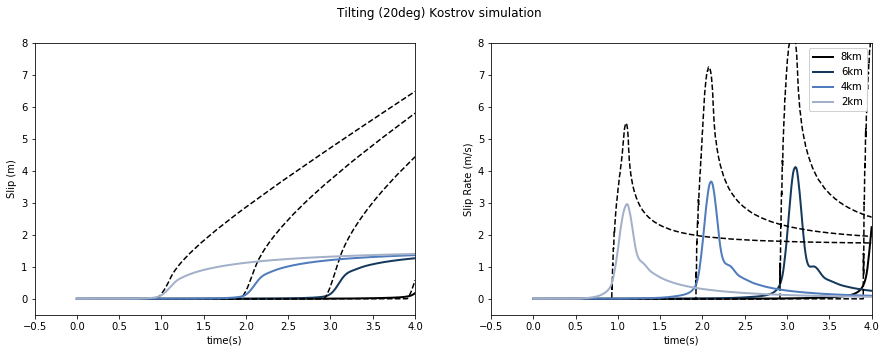

In [12]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210914/"
TiltedFile = LoadPickleFile(Filename = "P5_P3_050x050_Blend_delta50-Tilt20.0-P3-TPList_t4090_d50.0.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) Kostrov simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

format_axes(fig,True)

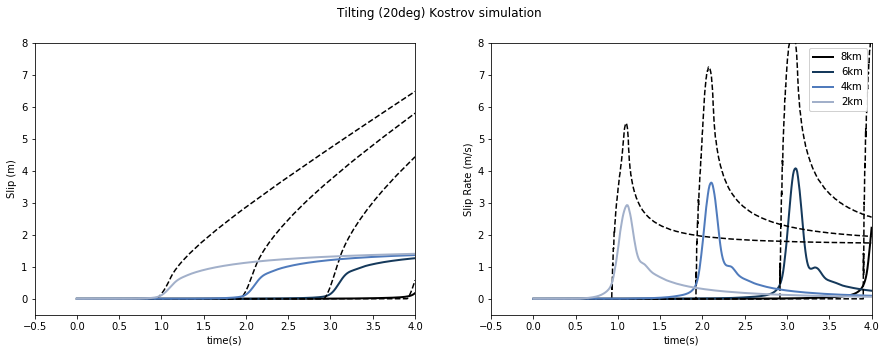

In [13]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210914/"
TiltedFile = LoadPickleFile(Filename = "P5_P3_050x050_I-Tilt20.0-P3-TPList_t4090_d50.0.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) Kostrov simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

format_axes(fig,True)

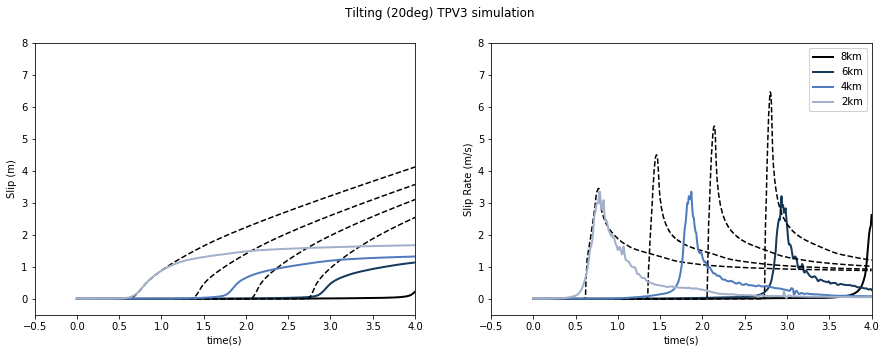

In [14]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210914/"
TiltedFile = LoadPickleFile(Filename = "P5_P3_050x050_tpv3_delta50_Maxwell-Tilt20.0-P3-TPList_t4090_d50.0.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) TPV3 simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)

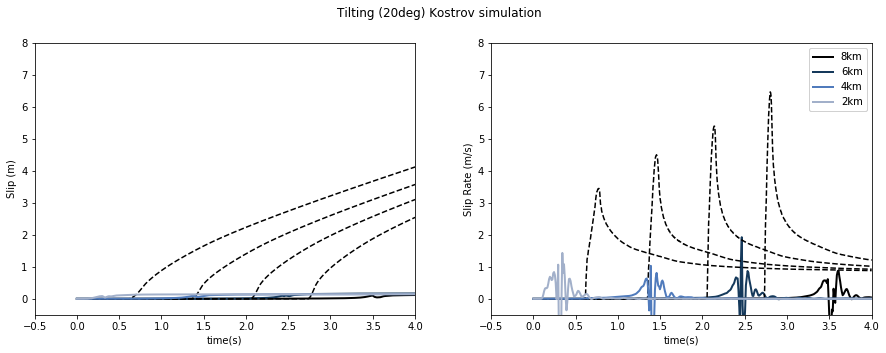

In [15]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210914/"
TiltedFile = LoadPickleFile(Filename = "P5_P3_050x050_tpv3_deltaf1_StupidTest_FixSign-Tilt20.0-P3-TPList_t4090_d50.0.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) Kostrov simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)

# 20210921 TPV3
P1- figure without any blending, delta = 100m elements = 25m x 25m

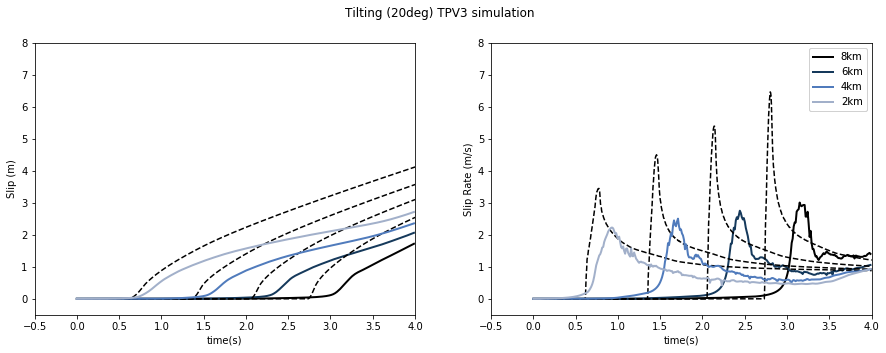

In [18]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210921/"
TiltedFile = LoadPickleFile(Filename = "FML_TPV_tilt_P1_025x025_df4-NoBlend-Tilt20.0-P1-TPList_t3380_d100.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) TPV3 simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)

# 20210922 TPV3
P1- figure without any blending, delta = 100m elements = 25m x 25m

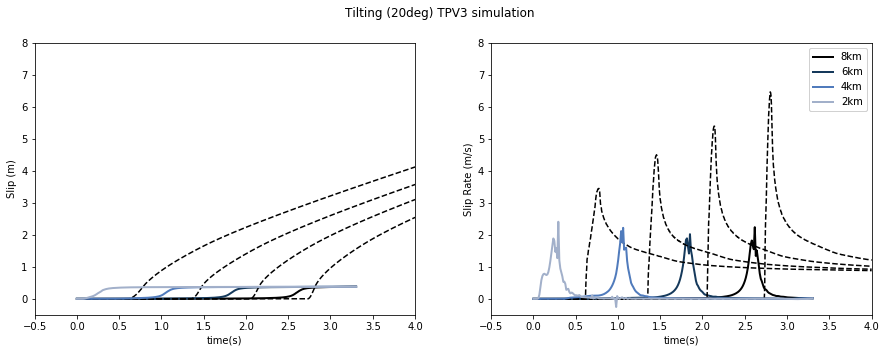

In [20]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210922/"
TiltedFile = LoadPickleFile(Filename = "FML_TPV_Tilt_P1_025x025_d4_A-Bullshit-Tilt20.0-P1-TPList_t2800_d100.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) TPV3 simulation")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)

# Kostrov 20210927

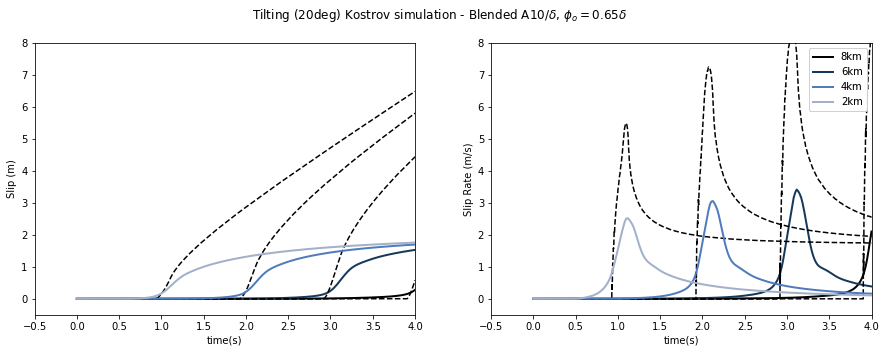

In [23]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210927/"
TiltedFile = LoadPickleFile(Filename = "FML_Kos_T20_P1_025x025_d100_BlA10Phio65-Tilt20.0-P1-TPList_t2261_d100.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) Kostrov simulation - Blended A10/$\delta$, $\phi_o=0.65\delta$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

format_axes(fig,True)

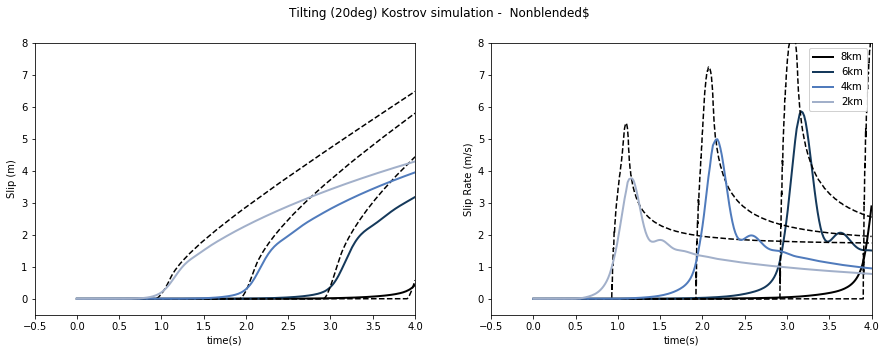

In [25]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210927/"
TiltedFile = LoadPickleFile(Filename = "FML_Kos_T20_P1_025x025_d100_NoBlend-Tilt20.0-P1-TPList_t2261_d100.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) Kostrov simulation -  Nonblended$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

format_axes(fig,True)

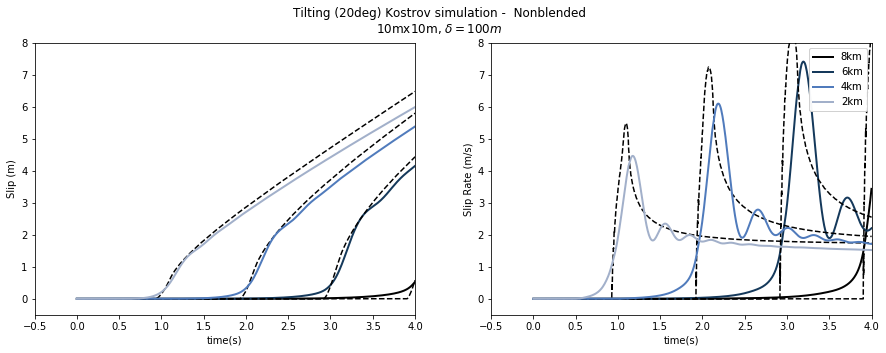

In [33]:


FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210927/"
TiltedFile = LoadPickleFile(Filename = "FML_Kos_T20_P1_010x010_d100_NoBlend-Tilt20.0-P1-TPList_t5652_d100.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) Kostrov simulation -  Nonblended\n10mx10m, $\delta=100m$")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefList]

format_axes(fig,True)

# TPV3 20210927

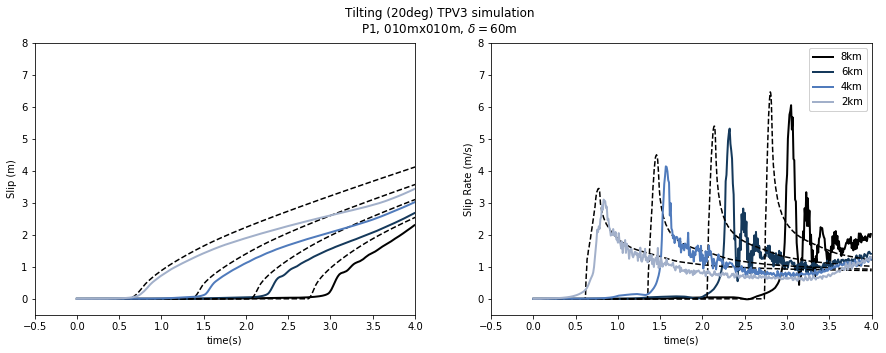

In [31]:
FolderTiltedPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/PlottingData/NewBatch-20210927/"
TiltedFile = LoadPickleFile(Filename = "FML_TPV_T20_P1_010x010_d6_NoBlend_OldKV_50Off-Tilt20.0-P1-TPList_t8478_d60.pickle",FolderPath = FolderTiltedPath)


fig, axis = GenericFigAxis()

# Tilted case plotting
iidx = 0
for iidx,Test1 in enumerate(TiltedFile[:-1]):
    axis[0].plot(Test1.Time, Test1.DispX, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
    axis[1].plot(Test1.Time, Test1.VelX, color= cmap.colors[iidx],linewidth=2,zorder=iidx) 

LabelsPerColor= ["50x50 - P3 - $\delta=50.$x$ 1.43$"]

fig.suptitle("Tilting (20deg) TPV3 simulation\nP1, 010mx010m, $\delta=$60m")
[item.PlotReference(axis[0], "Slip", filtering=False) for item in RefListTPV]
[item.PlotReference(axis[1], "SlipRate", filtering=False) for item in RefListTPV]

format_axes(fig,True)